The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


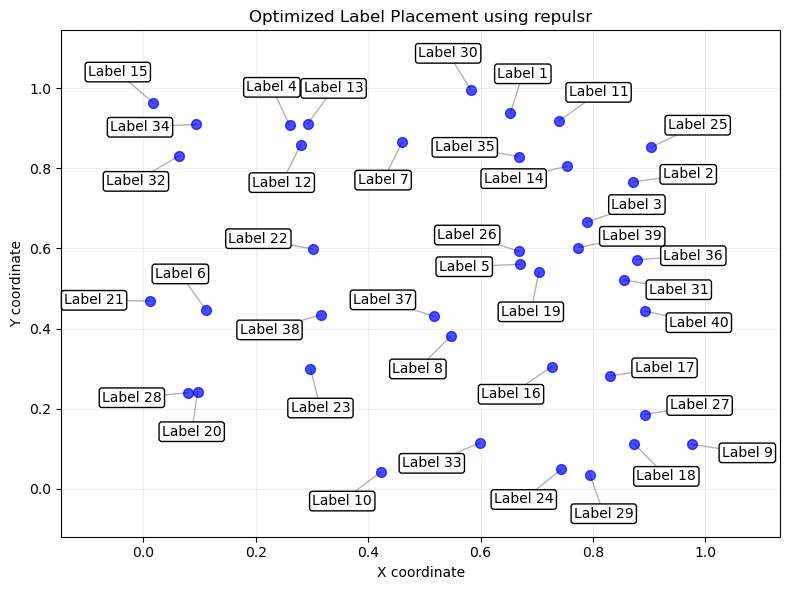

In [43]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from repulsr import optimize_box_positions

# Create some random points
# np.random.seed(42)
n_points = 40
points = np.random.rand(n_points, 2)

# Create labels for each point
labels = [f'Label {i+1}' for i in range(n_points)]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the original points
ax.scatter(points[:, 0], points[:, 1], s=50, color='blue', alpha=0.7)

# Define text and box styling parameters
text_kwargs = {'fontsize': 10}
bbox_kwargs = {'boxstyle': 'round,pad=0.2', 'facecolor': 'white', 'edgecolor': 'black'}
# bbox_kwargs = None

# Apply the optimize_box_positions function
positions_history, energy_history = optimize_box_positions(
    ax,
    points,
    labels,
    sigma_label=0.1,
    sigma_point=0.15,
    max_distance=0.1,
    n_steps=75,
    step_size=0.01,
    text_kwargs=text_kwargs,
    bbox_kwargs=bbox_kwargs
)

# Draw lines from points to their labels
final_positions = positions_history[-1]
for i, (px, py) in enumerate(points):
    # Extract center position from box [x, y, width, height]
    lx, ly = final_positions[i][0], final_positions[i][1]
    ax.plot([px, lx], [py, ly], 'k-', alpha=0.3, linewidth=1)

# Set plot limits and labels
# ax.set_xlim(-0.1, 1.1)
# ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('Optimized Label Placement using repulsr')
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()